### If the river is influenced by sea tide, such that its level fluctuates twice a day between +1 and -1 m relative to the average value. How does this tide influence the required pumping? Is the location of the most critical point still the same?

### How much is the delay between the tide in the river and the fluctuation at the critical point in the building pit?

## Superposition in time

Any varying head can be approximated using a series of constant heads over short time intervals. This allows to use de 1D solution for a sudden head change to simulate the effect on an aquifer of a varying river head. It is assumed that the aquifer is in direct good contact with the surface water at $x=0$.

The superpostion may be written as

$$ s(x, t) = \sum _{i=1} ^{N} \left\{ A_i \mathtt{erfc} 
\sqrt{\frac {x^2 S} {4 kD (t - t_i)}} \right\}, \,\,\, t \ge t_i $$

Clearly, $a$ term $i$ is non-existent when $t < t_i$.

This formula can be computed by looping over the amplituces and times pertaining to each moment on which the amplitude changes.

With a series of amplitudues A, what matters is the change of amplitude. So we need

$$ A = A_0, A_1 - A_0, A_2 - A_1, ... A_n - A_{n-1} $$

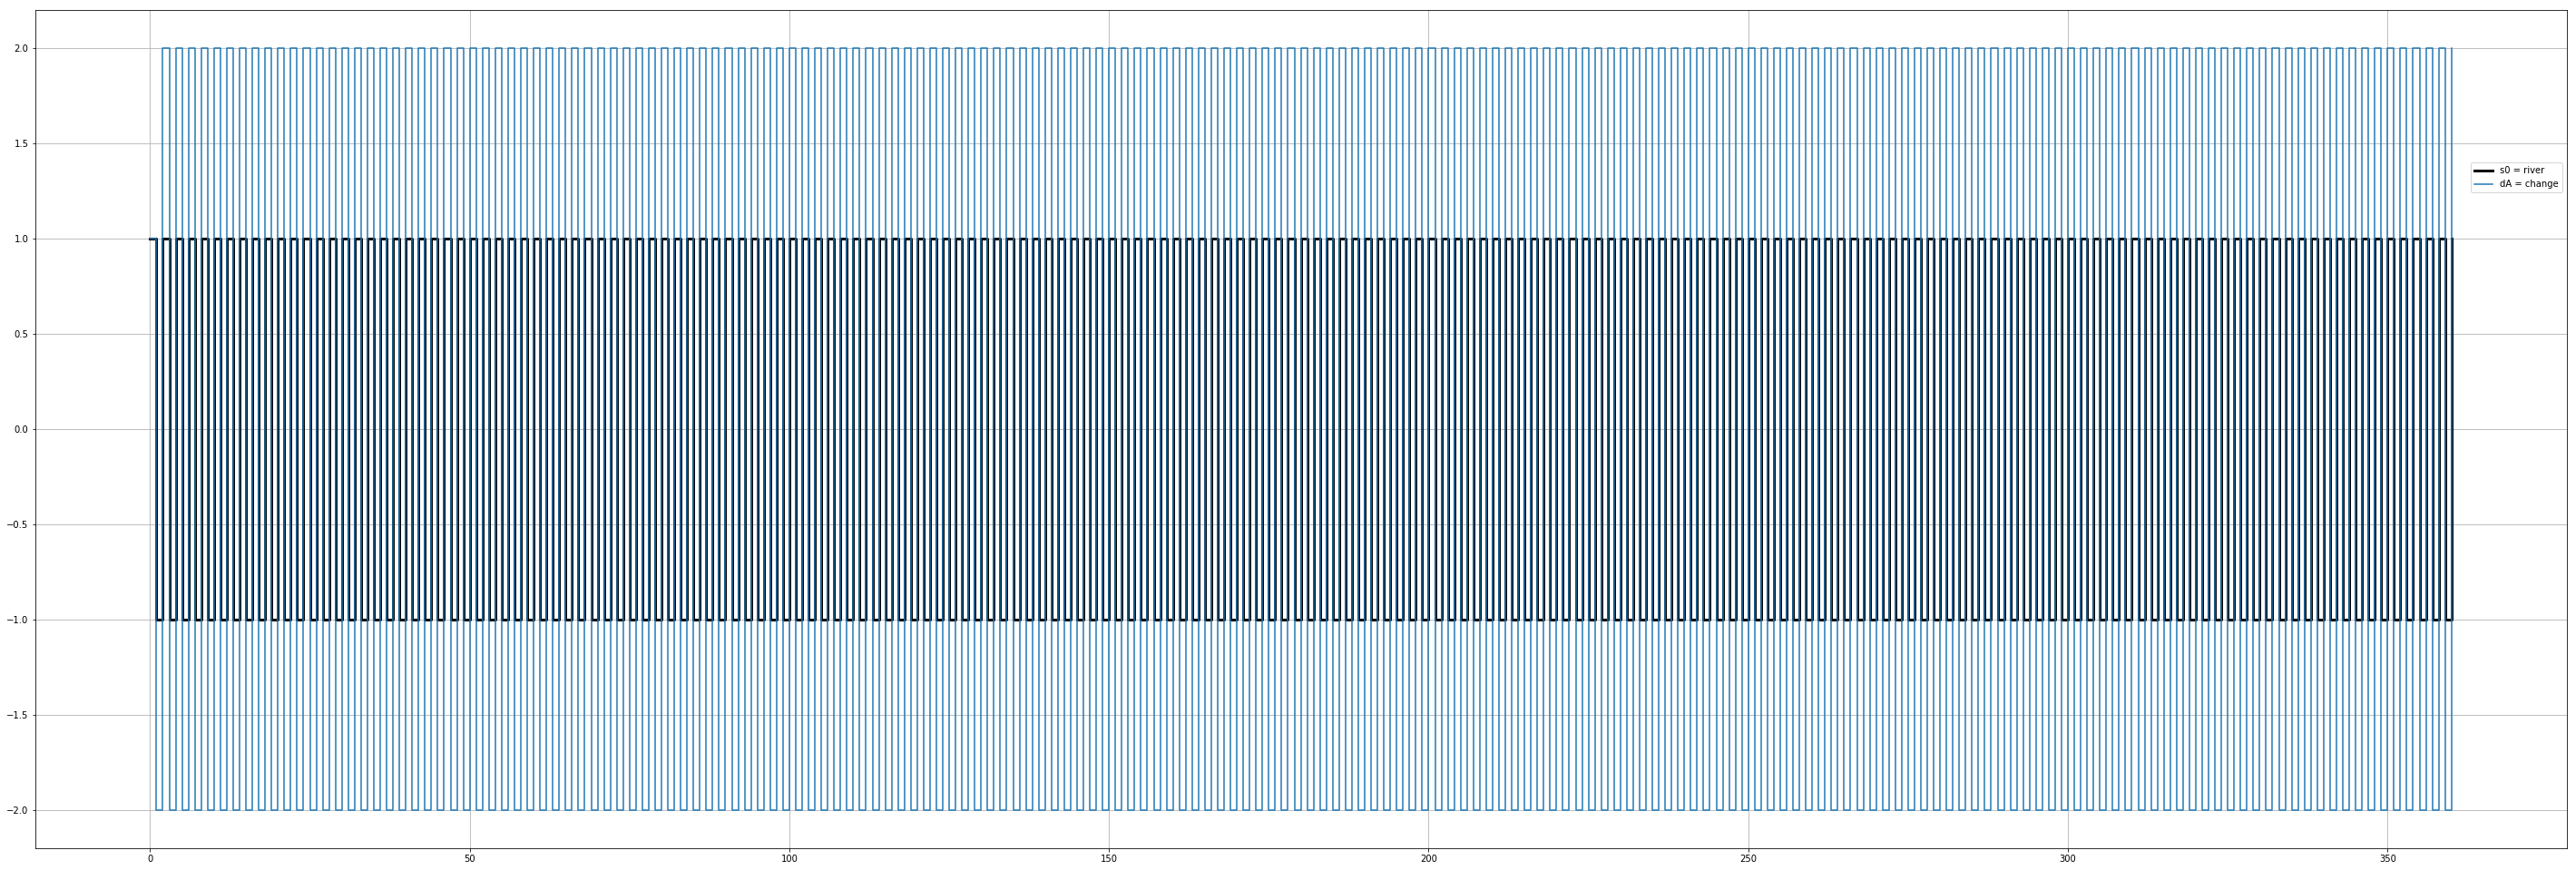

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 # Theis well function
from scipy.special import erfc 
W=exp1

kD = 900 # m2/d
S = 0.1 # [-]
i=-1
s0 =[]   # to define amplitude of the river level change
days = np.linspace(0,360,361)
for t in days:
    A1=i**t
    s0.append(A1)
swt   = np.arange(len(s0)) # switch times
A     = np.hstack((s0[0], np.diff(s0)))

plt.figure(figsize=[50,17])
plt.step(swt, s0, 'k', label="s0 = river", lw=3, where='post')
plt.step(swt, A, label='dA = change', where='post')
plt.grid()
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()

## lets check what will happen at critical point ( x=450 ) and mid of the building pit ( x=425 m) as well as x= 400 m  because of changing level of river because of sea tide.

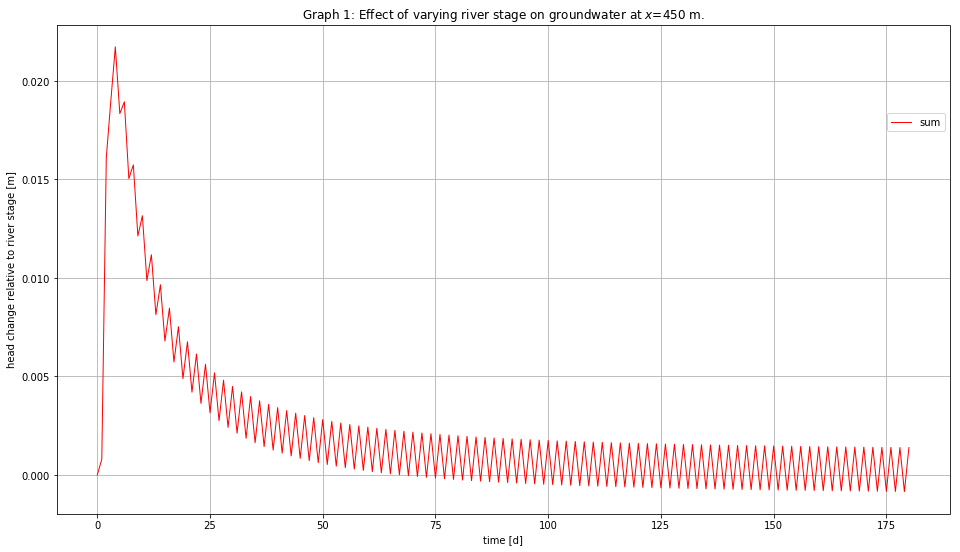

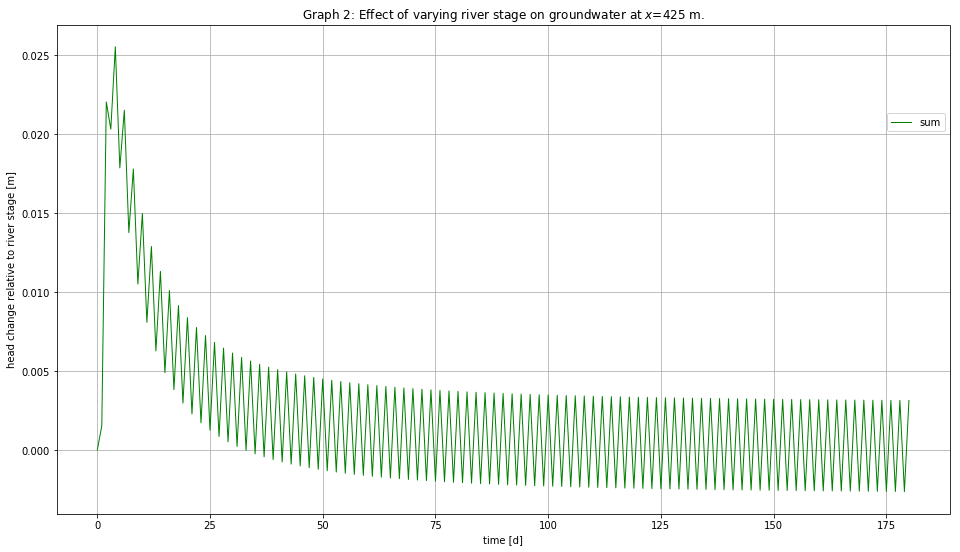

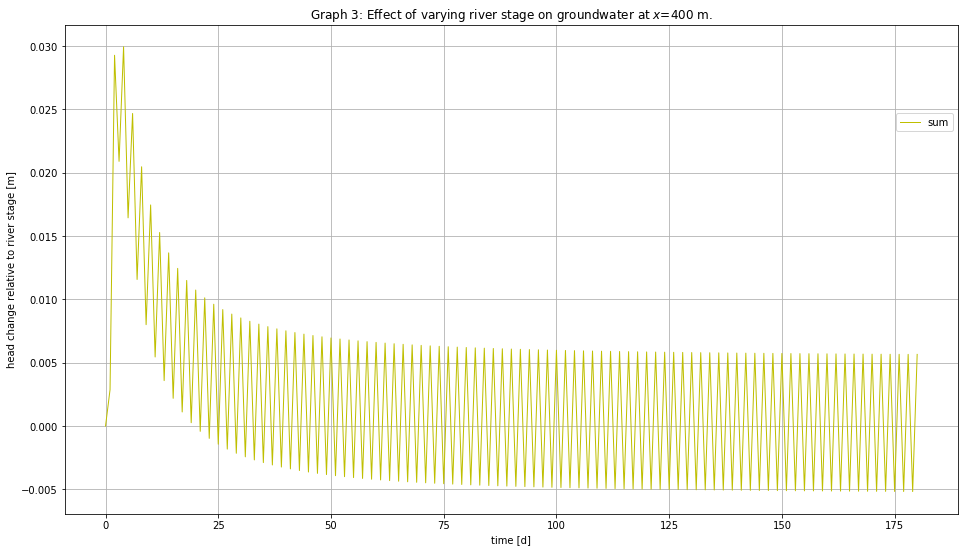

In [21]:
x = 450 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Graph 1: Effect of varying river stage on groundwater at $x$={:.0f} m.".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'r-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()
#-------------------------------------------------------------------------------------------------------------------------#

x = 425 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Graph 2: Effect of varying river stage on groundwater at $x$={:.0f} m.".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'g-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()

#--------------------------------------------------------------------------------------------------------------------------#
x = 400 # m choose a value for x
t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Graph 3: Effect of varying river stage on groundwater at $x$={:.0f} m.".format(x))
plt.xlabel('time [d]')
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'y-', label='sum', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()


### Conclusion: It is clearly seen that, change in water level will effect more at x=400 m which is the location of extraction well. But, in the critical point the effect of the tide is not as much as x= 400 m. 

-------------------------------------------------------------------------------------------------------------------------------------

### How much is the delay between the tide in the river and the fluctuation at the critical point in the building pit?

### Lets have a look on the Graph 1 by zooming it in. 

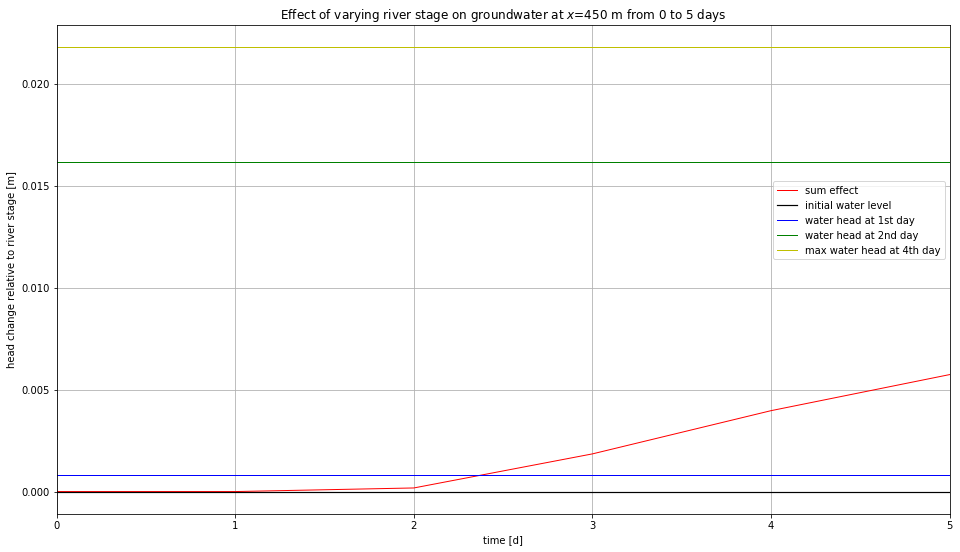

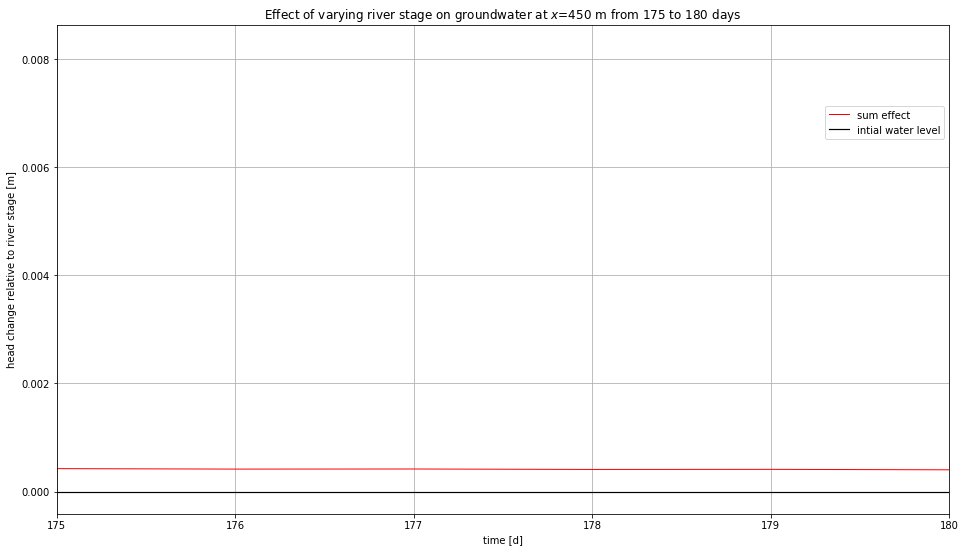

In [19]:
x = 450 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Effect of varying river stage on groundwater at $x$={:.0f} m from 0 to 5 days".format(x))
plt.xlabel('time [d]')
plt.xlim(0,5)
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'r-', label='sum effect', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')

plt.axhline(y=0.0000, linewidth=1.2, color='k', label='initial water level')
plt.axhline(y=0.0008, linewidth=1, color='b',label='water head at 1st day')
plt.axhline(y=0.01615,linewidth=1, color='g',label='water head at 2nd day')
plt.axhline(y=0.0218, linewidth=1, color='y',label='max water head at 4th day')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.6))

plt.show()

#--------------------------------------------------------------------------------------------------------------------------------------------#
x = 450 # m choose a value for x

t = np.linspace(0, 180, 181) # days


# plot heads
plt.figure(figsize=[16,9])
plt.title("Effect of varying river stage on groundwater at $x$={:.0f} m from 175 to 180 days".format(x))
plt.xlabel('time [d]')
plt.xlim(175,180)
plt.ylabel('head change relative to river stage [m]')
plt.grid()

y = np.zeros_like(t)
for st, Ai in zip(swt, A):
    u = np.sqrt((x**2 * S)/(4 * kD * (t[t > st] - st)))        
    yy = Ai * erfc(u)  # logical indexing
    #plt.plot(t[t>st], yy, label='st = {:.0f} d'.format(st))
    y[t>st] += yy
plt.plot(t, y, 'r-', label='sum effect', lw=1) 
#plt.step(swt, s0, 'g--', label='river', where='post')

plt.axhline(y=0.0000, linewidth=1.2, color='k', label='intial water level')
plt.legend(loc='center right',bbox_to_anchor=(1.0, 0.8))
plt.show()